In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
path=r"C:\Users\HP\Downloads\dataset\Soybean Seeds"

In [3]:
IMAGE_SIZE=227
BATCH_SIZE=32
image_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,horizontal_flip=True,validation_split=0.2)

train_datagen=image_generator.flow_from_directory(path,target_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=32,class_mode='categorical',subset='training')
test_datagen=image_generator.flow_from_directory(path,target_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=32,subset='validation',shuffle=False)


Found 4412 images belonging to 5 classes.
Found 1101 images belonging to 5 classes.


In [23]:
from keras.regularizers import l2
def create_model():
    model=Sequential([
        Conv2D(filters=128,kernel_size=(3,3),padding='valid',input_shape=(227,227,3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        BatchNormalization(),
        Dropout(0.5),
        
        Conv2D(filters=64,kernel_size=(3,3),padding='valid',input_shape=(227,227,3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        BatchNormalization(),
        Dropout(0.5),
        Conv2D(filters=32,kernel_size=(3,3),padding='valid',input_shape=(227,227,3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        BatchNormalization(),
        Dropout(0.5),
        Flatten(),
        
        Dense(units=128, activation='relu',kernel_regularizer=l2(0.01)),
        Dropout(0.25),
        Dense(units=5, activation='softmax',kernel_regularizer=l2(0.01))
    ])
    return model

In [24]:
cnn_model = create_model()

In [25]:
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 225, 225, 128)     3584      
                                                                 
 activation_3 (Activation)   (None, 225, 225, 128)     0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 128)    0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 112, 112, 128)    512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 128)     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 64)     

In [26]:
optimizer = 'adam'

In [27]:
cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = cnn_model.fit(train_datagen, epochs=10, validation_data=test_datagen,
                       verbose=1,callbacks=[early_stopping])

Epoch 1/10
138/138 [==============================] - 352s 3s/step - loss: 4.1893 - accuracy: 0.4495 - val_loss: 10.6986 - val_accuracy: 0.2180
Epoch 2/10
138/138 [==============================] - 631s 5s/step - loss: 2.6474 - accuracy: 0.5202 - val_loss: 5.3818 - val_accuracy: 0.3869
Epoch 3/10
138/138 [==============================] - 346s 3s/step - loss: 2.1487 - accuracy: 0.5485 - val_loss: 4.7611 - val_accuracy: 0.1962
Epoch 4/10
138/138 [==============================] - 347s 3s/step - loss: 1.8130 - accuracy: 0.6090 - val_loss: 2.0420 - val_accuracy: 0.4369
Epoch 5/10
138/138 [==============================] - 360s 3s/step - loss: 1.6145 - accuracy: 0.6398 - val_loss: 8.4291 - val_accuracy: 0.2625
Epoch 6/10
138/138 [==============================] - 359s 3s/step - loss: 1.5014 - accuracy: 0.6704 - val_loss: 5.2311 - val_accuracy: 0.2416
Epoch 7/10
138/138 [==============================] - 346s 3s/step - loss: 1.4170 - accuracy: 0.6999 - val_loss: 2.5931 - val_accuracy: 0.465

In [30]:
cnn_model.save('cnn2.h5')
from keras.models import load_model
saved_model=load_model("cnn2.h5")

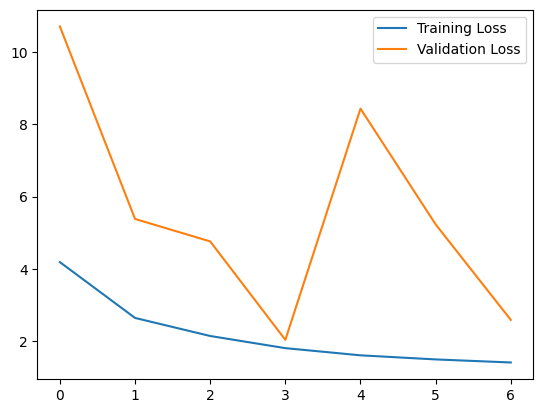

In [31]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [32]:
test_loss, test_accuracy = saved_model.evaluate(test_datagen, batch_size=32)

35/35 [==============================] - 18s 494ms/step - loss: 2.0387 - accuracy: 0.4414


In [33]:
import cv2
import matplotlib.pyplot as plot
p=r"C:\Users\HP\Downloads\Soybean Seeds\Soybean Seeds\Immature soybeans\1033.jpg"
#IMG_SIZE=227
#img_array=cv2.imread(p,cv2.IMREAD_COLOR)
#new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
#new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)
img=cv2.imread(p)
resize_img=cv2.resize(img,(227,227)).reshape(-1,227,227,3)/255
y=saved_model.predict(resize_img)
#print(y)
#score=y[0]

1/1 [==============================] - 0s 158ms/step


In [34]:
classes=list(train_datagen.class_indices)

In [35]:
np.argmax(y)

1

In [36]:
if np.argmax(y)==0:
    print("BORKEN SOYBEAN")
elif np.argmax(y)==1: 
    print("IMMATURE SOYBEAN")
elif np.argmax(y)==2:
    print("INTACT SOYBEAN")
elif np.argmax(y)==3:
    print("SKIN-DAMAGED SOYBEAN")
elif np.argmax(y)==4:
    print("SPOTTED SOYBEAN")

IMMATURE SOYBEAN


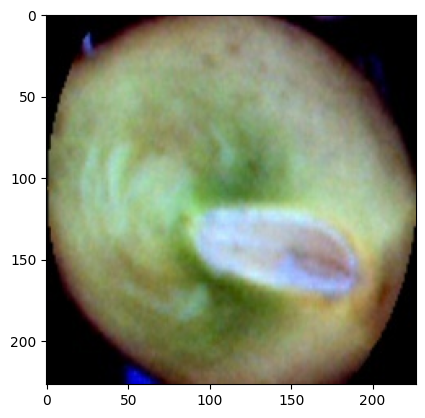

In [37]:
x=plt.imread(p)
plt.imshow(x)

In [38]:
predictions = cnn_model.predict(test_datagen)

35/35 [==============================] - 18s 495ms/step


In [39]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_datagen.classes

In [41]:
print(classification_report(y_true, y_pred, target_names=classes))

                       precision    recall  f1-score   support

      Broken soybeans       0.51      0.46      0.48       200
    Immature soybeans       0.95      0.17      0.29       225
      Intact soybeans       0.35      0.95      0.51       240
Skin-damaged soybeans       0.79      0.12      0.20       225
     Spotted soybeans       0.53      0.47      0.50       211

             accuracy                           0.44      1101
            macro avg       0.63      0.43      0.40      1101
         weighted avg       0.63      0.44      0.39      1101

